# Graded: 20 of 20 correct
1. Part 1
- [x] Create 1000 x 1000 matrix
- [x] Row sum
- [x] Column sum
- [x] Time sums
- [x] Loop row sum
- [x] Loop col sum
- [x] Time loop sums
- [x] Compare numpy to loop

2. Part 2
- [x] X array
- [x] Y array
- [x] Print out vehicle count
- [x] Train test split
- [x] Y test/train histograms
- [x] Linear regression fit
- [x] Print the regression coefficients
- [x] Print the mean squared error
- [x] Print R^2
- [x] Correct scatterplots
- [x] Correct layout
- [x] Axes/labels

Comments: 


##### <img src="../SDSS-Logo.png" style="display:inline; width:500px" />


# The objective of this programming exercise is two-fold:
* To run an example that shows the computational efficiency of the Numpy numerical library;
* Get experience with scikit-learn by building a predictive model from data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

***
## Part 1
### For this part, you are going to compare the time it takes to compute row sums and column sums for a large matrix using Numpy functions vs for loops.

#### Numpy method
* Create a large matrix of size `(1000 X 1000)` of random values.
* Use the Numpy `np.sum()` method to calculate the row sums and column sums of this matrix.
* Track the amount of time it took to calculate the row sum and the column sum.
    * You can use the `time.time()` function to track time.

In [5]:
# Write your code here
lg_matrix = np.random.random(size=[1000,1000])

# Start clock
start = time.time()

# Numpy methods
row_sums = np.sum(lg_matrix, axis=0)
col_sums = np.sum(lg_matrix, axis=1)

# Stop clock
stop = time.time()

# output
print(f'Time to perform np.sum(rows) and np.sum(columns): {stop - start} (s)')

Time to perform np.sum(rows) and np.sum(columns): 0.0010008811950683594


#### for loop method
* Now use `for` loops to compute the row sums and columns sums for the same matrix.
* Again, track the time using the `time.time()` function

In [38]:
# Your code here

# Instance the arrays outside of time measurement since we're just comparing the methods
row_sums_loop = []
col_sums_loop = []

# Start clock
start_loop = time.time()

# The process will be quicker if we aren't accessing all 1000 elements directly for each loop
# instead, we get the length of the direction and use numpy indexing to access the values when
# suming 
for r in range(len(lg_matrix)):
    row_sums_loop.append(sum(lg_matrix[r,:]))

# Preform same operation for columns
for c in range(len(lg_matrix)):
    col_sums_loop.append(sum(lg_matrix[:, c]))

# Stop clock
stop_loop = time.time()

print(f'Time to perform sum() using for loops on col/row: {stop_loop - start_loop} (s)')

Time to perform sum() using for loops on col/row: 0.08035874366760254 (s)


### Comprehension

In [39]:
# start
start_comp = time.time()

# List Comprehension
row_sums_comp = [sum(lg_matrix[r,:]) for r in range(len(lg_matrix))]
col_sums_comp = [sum(lg_matrix[:, c]) for c in range(len(lg_matrix))]

# stop
stop_comp = time.time()

print(f'Time to perform sum() using list comprehension col/row: {stop_loop - start_loop} (s)')

Time to perform sum() using list comprehension col/row: 0.08035874366760254 (s)


### Sets ?

In [49]:
# Instance the arrays outside of time measurement since we're just comparing the methods
row_sums_loop =set()
col_sums_loop = set()

# Start clock
start_loop = time.time()

# The process will be quicker if we aren't accessing all 1000 elements directly for each loop
# instead, we get the length of the direction and use numpy indexing to access the values when
# suming 
for r in range(len(lg_matrix)):
    row_sums_loop.add(sum(lg_matrix[r,:]))

# Preform same operation for columns
for c in range(len(lg_matrix)):
    col_sums_loop.add(sum(lg_matrix[:, c]))

# Stop clock
stop_loop = time.time()

print(f'Time to perform sum() using for loops on col/row: {stop_loop - start_loop} (s)') 

# start
start_comp = time.time()

# List Comprehension
row_sums_comp = {sum(lg_matrix[r,:]) for r in range(len(lg_matrix))}
col_sums_comp = {sum(lg_matrix[:, c]) for c in range(len(lg_matrix))}

# stop
stop_comp = time.time()

print(f'Time to perform sum() using set comprehension col/row: {stop_loop - start_loop} (s)')


Time to perform sum() using for loops on col/row: 0.07559466361999512 (s)
Time to perform sum() using set comprehension col/row: 0.07559466361999512 (s)


***
#### Compare the time taken by the two methods.
* What is your conclusion?
* Try other array computations and compare the difference.

Numpy's built in methods **are faster**, *significantly* faster depends on whether you consider a `0.079 (s)` difference to be noticable. As the amount of data scales, I would assume the `for loop` method gets **exponentially slower**. 

I tried list comprehensions to see if generating the array of sums() would improve speed over appending them, however, as it is just a for loop itself the time was exactly the same. 

I also tried sets, and interestingly enough, the time for them varies on each run (0.07-0.09) with an average seemingly around the same as an array/list. It likely depends on how the hashs are being assigned, but I don't know enough about what happens 'under the hood' to be able to say what's happening with confidence.

Numpy's module contains C which python is used to call the C functionality to perform the data intensive operations which is why it's faster than native python computation. 

***
## Part 2
### For this part, you will create a predictive model using scikit-learn to predict vehicle MPG from vehicle characteristic data.
* The data for this part is from [EPA fuel ecomony](https://www.fueleconomy.gov/) website.
* For the purpose of this programming exercise, we have downloaded this data and modified it to create a reasonably clean analytical data set.
* The data set includes the model years 2020-2023.

### Load the vehicles data set for 2020-2023.
* The data is in the CSV file `carDataMPG2023.csv`
* The code below uses the pandas `read_csv()` function to read the data into a pandas data frame.
    * You will learn about pandas and data frame in the next unit, but here we are using it here to simplify the setting up of the problem.

In [69]:
import sklearn

# Read the car MPG data
carDataRead = pd.read_csv("carDataMPG2023.csv")
carDataRead.head(10)

,id,make,model,year,fuelType1,drive,trany,VClass,cylinders,displ,speeds,drive_number,avgMpg
0,41213,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,46.31000
1,41215,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,2.0,6.0,2,42.54910
2,41216,Toyota,Corolla XSE,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,45.39342
3,41218,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,1.8,6.0,2,44.54000
4,41222,Kia,Soul,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Small Station Wagons,4.0,2.0,6.0,2,35.47000
5,41223,Kia,Soul,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AM-S7),Small Station Wagons,4.0,1.6,7.0,2,37.86000
6,41227,Kia,Sportage FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 2WD,4.0,2.4,6.0,2,33.36895
7,41228,Kia,Sportage FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 2WD,4.0,2.0,6.0,2,29.61000
8,41229,Kia,Telluride FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S8),Small Sport Utility Vehicle 2WD,6.0,3.8,8.0,2,29.00000
9,41230,Kia,Sportage AWD,2020,Regular Gasoline,All-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 4WD,4.0,2.4,6.0,4,30.21267


### Next create Numpy arrays of the predictor and target variables.
* The predictor variables will be the columns `cylinders`, `displ`, `speeds` and `drive_number`
    * Call the array of predictor variables X
* The target variable will be the column `avgMpg`
    * Call the array of target variable Y
* The Numpy `np.array()` function can convert a homogeneous section of a data frame to a Numpy array.

In [92]:
# Your code here

#X = np.array([carDataRead['cylinders'], carDataRead.get('displ'), carDataRead.get('speeds'), carDataRead.get('drive_number')])
X = np.array(carDataRead[['cylinders','displ','speeds','drive_number']])
Y = np.array(carDataRead.get('avgMpg'))

# Check to make sure they're the same size (required for training)
print(f'X : {len(X)} \nY : {len(Y)}')




X : 4536 
Y : 4536


### Print out the number of vehicles in the dataset

In [93]:
# Your code here

# Assume that 'id' is unique for each variable
# Grab id, drop NA vals, drop potential duplicates, return length of array
print(f'Number of Vehicles in dataset: {len(carDataRead['id'].dropna().unique())}' )

Number of Vehicles in dataset: 4536


### Split the X and Y arrays into training and testing datasets using `train_test_split()`.
* Keep 80% of the data for training and 20% for testing. 
* Call the training and testing splits `X_train`, `Y_train`, `X_test` and `Y_test`.

In [94]:
# Your code here
from sklearn.model_selection import train_test_split

# Train set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)



### Plot the histograms of `Y_test` and `Y_train` to make sure they are comparable.
* With a large dataset of this size, this is less of a problem than with small data set.
* Nonetheless  it is worth checking that the training-test split has not biased one of these subsets in one way or another.

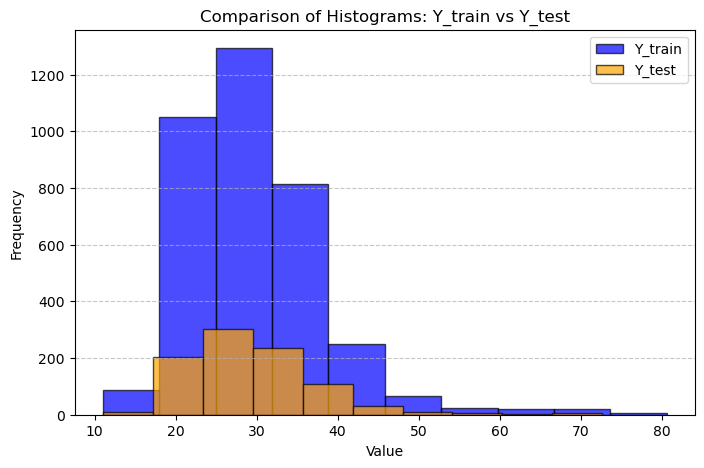

In [101]:
# Your code here
import matplotlib.gridspec as gridspec

plt.figure(figsize=(8, 5))
plt.hist(Y_train,  alpha=0.7, label='Y_train', color='blue', edgecolor='black')
plt.hist(Y_test,  alpha=0.7, label='Y_test', color='orange', edgecolor='black')

# Add titles and labels
plt.title('Comparison of Histograms: Y_train vs Y_test')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Linear regression fit
* Use the `LinearRegression` model in scikit learn to fit a regression model with `X_train` as the predictor variable and `Y_train` as the target.
* Use the `predict()` method from the fitted model to predict `avgMpg` from `X_test`, and call the predicted value `Y_pred`.

In [104]:
# Your code here
import sklearn.linear_model


regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

### Outputs
* Print the regression coefficients
* Print the mean squared error between `Y_test` and `Y_pred`
* Print the R^2, called the [coefficient of determination,](https://en.wikipedia.org/wiki/Coefficient_of_determination) between `Y_test` and `Y_pred`

In [118]:
# Your code here
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# cdf = pd.DataFrame(regression_model.coef_, columns=['Coefficients'])
print(f'Regression Coeffs: {regression_model.coef_}\n')

print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')

print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

Regression Coeffs: [-1.40080761 -2.21594785 -0.90650685 -1.26168815]

Mean Squared Error between Y_test & Y_pred: 27.39510051724363

R^2 Coeffecient: 0.5660893790590538


***
### Scatter plots
* Create scatter plots of `Y_test` and `Y_pred` against each of the 4 predictor variables `cylinders`, `displ`, `speeds`, `drive_number`.
* Do this as subplots in a 2 X 2 grid. 
* Label the subplots appropriately.
* Include axis labels also.

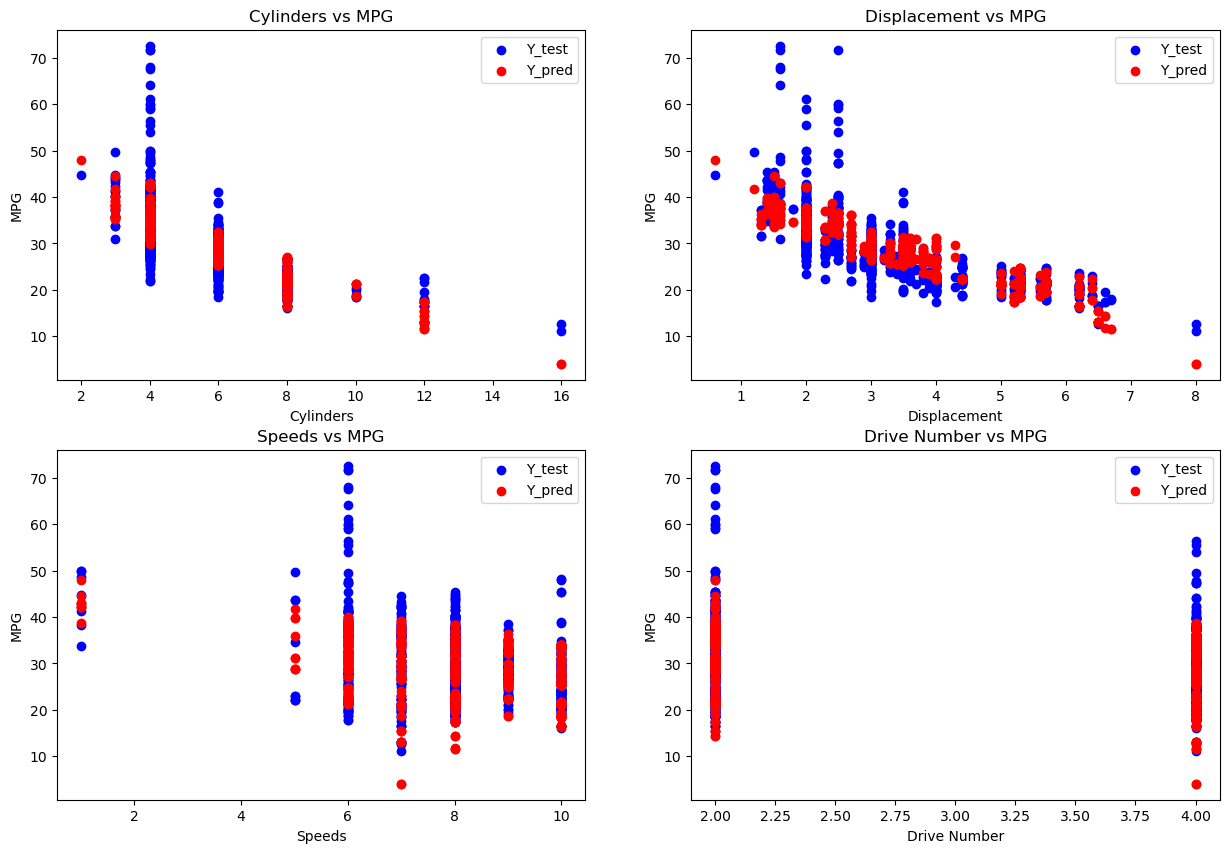

In [120]:
# Your code here
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for cylinders
axs[0, 0].scatter(X_test[:, 0], Y_test, color='blue', label='Y_test')
axs[0, 0].scatter(X_test[:, 0], Y_pred, color='red', label='Y_pred')
axs[0, 0].set_title('Cylinders vs MPG')
axs[0, 0].set_xlabel('Cylinders')
axs[0, 0].set_ylabel('MPG')
axs[0, 0].legend()

# Scatter plot for displ
axs[0, 1].scatter(X_test[:, 1], Y_test, color='blue', label='Y_test')
axs[0, 1].scatter(X_test[:, 1], Y_pred, color='red', label='Y_pred')
axs[0, 1].set_title('Displacement vs MPG')
axs[0, 1].set_xlabel('Displacement')
axs[0, 1].set_ylabel('MPG')
axs[0, 1].legend()

# Scatter plot for speeds
axs[1, 0].scatter(X_test[:, 2], Y_test, color='blue', label='Y_test')
axs[1, 0].scatter(X_test[:, 2], Y_pred, color='red', label='Y_pred')
axs[1, 0].set_title('Speeds vs MPG')
axs[1, 0].set_xlabel('Speeds')
axs[1, 0].set_ylabel('MPG')
axs[1, 0].legend()

# Scatter plot for drive_number
axs[1, 1].scatter(X_test[:, 3], Y_test, color='blue', label='Y_test')
axs[1, 1].scatter(X_test[:, 3], Y_pred, color='red', label='Y_pred')
axs[1, 1].set_title('Drive Number vs MPG')
axs[1, 1].set_xlabel('Drive Number')
axs[1, 1].set_ylabel('MPG')
axs[1, 1].legend()


plt.show()
